## TSNE Analysis of VirProBERT Few Shot Classifier
### Dataset: EMBL mapping, Vertebrates, IDV

**Models**: VirProBERT, Few-Shot Classifier

**Maximum Sequence Length**: segment len 256, stride 64

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../..']

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
virprobert_fsl_embedding_file_path = os.path.join(os.getcwd(), "..", "..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241125/host_multi/embedding/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_vs30_fsl_hybd_attn_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-4_output.csv")

In [4]:
virprobert_fsl_embedding_df = pd.read_csv(virprobert_fsl_embedding_file_path, index_col=0)
virprobert_fsl_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,uniref90_id,y_true
0,0.791518,0.208897,0.936096,-0.313983,0.585398,-2.917792,-1.034206,0.576581,-0.222822,-1.652930,...,1.910589,0.232360,-2.272832,0.084557,-0.517028,0.318573,-0.437695,0.126872,['UniRef90_A0A1V0PPG3'],Homo sapiens
1,0.713232,0.179995,1.526843,-0.096634,0.260623,-2.924125,-0.989074,0.364520,0.185197,-1.585284,...,1.810491,0.377177,-2.746990,0.217948,-1.050209,0.554749,-0.684909,-0.113867,['UniRef90_A0A221SH23'],Homo sapiens
2,0.712168,0.295743,1.586939,-0.128853,0.285933,-2.893377,-1.038578,0.470673,0.120777,-1.602597,...,1.748331,0.345154,-2.728372,0.178342,-1.088412,0.473485,-0.622349,-0.098051,['UniRef90_A0A1J0FJR5'],Homo sapiens
3,0.763423,0.502471,1.338368,-0.530663,0.503785,-2.950042,-1.282879,0.756096,0.067459,-1.431326,...,1.556132,0.058741,-2.309312,0.160715,-1.035941,0.302223,-0.202874,0.261927,['UniRef90_A0A1Y1D6H8'],Homo sapiens
4,0.648569,0.027880,1.273979,-0.546541,0.675486,-3.052308,-0.784936,0.575651,-0.169791,-1.752899,...,1.919699,0.221440,-2.317079,-0.090481,-0.832398,0.312123,-0.555167,0.226609,['UniRef90_F1KFZ2'],Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220063,0.651049,0.284860,1.479915,-0.457436,0.597215,-2.829632,-0.825452,0.572222,-0.069532,-1.676552,...,1.583874,0.268371,-2.323480,-0.114570,-0.930466,0.265816,-0.584175,0.217599,['UniRef90_A0A0E3T0R5'],Homo sapiens
220064,0.612332,0.240172,1.480412,-0.004266,0.087218,-2.480037,-0.814322,0.321290,0.248569,-1.390312,...,1.538964,0.521547,-2.485666,0.140678,-0.954733,0.555076,-0.538487,-0.092599,['UniRef90_A0A1B0VDB5'],Homo sapiens
220065,0.641328,0.164487,1.641700,0.024543,0.304392,-2.634004,-0.895534,0.528335,0.101242,-1.447332,...,1.677486,0.352655,-2.490871,0.098154,-1.006648,0.416983,-0.608273,-0.121968,['UniRef90_V5Z088'],Homo sapiens
220066,0.866577,0.311498,0.737329,-1.153452,0.863739,-3.040595,-0.720841,0.427127,0.170800,-1.301472,...,1.478240,0.119959,-1.457262,0.273712,-0.766782,0.142746,0.047854,0.543194,['UniRef90_A0A2H4UME1'],Homo sapiens


In [5]:
label_col = "y_true"
virprobert_fsl_embedding_df[label_col].unique()

array(['Homo sapiens', 'Macaca mulatta', 'Cercocebus atys', 'Felis catus',
       'Semnopithecus entellus', 'Cercopithecus neglectus',
       'Mandrillus leucophaeus', 'Panthera pardus',
       'Cercopithecus solatus', 'Chlorocebus tantalus',
       'Chlorocebus sabaeus', 'Puma concolor', 'Panthera leo',
       'Cercopithecus nictitans', 'Cercopithecus aethiops pygerythrus',
       'Colobus guereza', 'Miopithecus ogouensis', 'Mandrillus sphinx',
       'Piliocolobus badius', 'Cercopithecus lhoesti',
       'Cercopithecus aethiops', 'Felis domesticus',
       'Felis silvestris catus', 'Cercopithecus cephus',
       'Macaca nemestrina', 'Cercopithecus erythrotis',
       'Piliocolobus tephrosceles', 'Cercopithecus mitis',
       'Macaca fascicularis', 'Cercopithecus ascanius',
       'Cercocebus torquatus', 'Cercopithecus mona', 'Bos taurus',
       'Chlorocebus pygerythrus', 'Lynx rufus',
       'Cercocebus torquatus atys', 'Macaca arctoides',
       'Otocolobus manul', 'Papio ursinus',

In [6]:
def compute_class_distribution(df, label_col, n):
    labels_counts = df[label_col].value_counts()
    print(labels_counts)
    labels_counts = labels_counts.to_dict()
    return labels_counts

In [7]:
metadata = compute_class_distribution(virprobert_fsl_embedding_df, label_col, n=virprobert_fsl_embedding_df.shape[0])

y_true
Homo sapiens                          218631
Macaca mulatta                           849
Felis catus                              143
Cercocebus atys                          122
Puma concolor                             24
Mandrillus sphinx                         23
Macaca nemestrina                         23
Mandrillus leucophaeus                    20
Cercopithecus nictitans                   19
Cercopithecus solatus                     17
Cercocebus torquatus                      16
Cercopithecus aethiops                    14
Colobus guereza                           13
Chlorocebus sabaeus                       13
Cercopithecus cephus                      13
Cercopithecus neglectus                   12
Panthera leo                              12
Chlorocebus tantalus                      10
Cercopithecus mona                        10
Felis silvestris catus                     9
Cercopithecus lhoesti                      8
Chlorocebus pygerythrus                    7
Cer

In [8]:
selected_hosts = [k for k, v in metadata.items() if v >= 6]

In [9]:
selected_hosts

['Homo sapiens',
 'Macaca mulatta',
 'Felis catus',
 'Cercocebus atys',
 'Puma concolor',
 'Mandrillus sphinx',
 'Macaca nemestrina',
 'Mandrillus leucophaeus',
 'Cercopithecus nictitans',
 'Cercopithecus solatus',
 'Cercocebus torquatus',
 'Cercopithecus aethiops',
 'Colobus guereza',
 'Chlorocebus sabaeus',
 'Cercopithecus cephus',
 'Cercopithecus neglectus',
 'Panthera leo',
 'Chlorocebus tantalus',
 'Cercopithecus mona',
 'Felis silvestris catus',
 'Cercopithecus lhoesti',
 'Chlorocebus pygerythrus',
 'Cercopithecus mitis']

In [10]:
len(selected_hosts)

23

In [11]:
virprobert_fsl_embedding_df_selected = virprobert_fsl_embedding_df[virprobert_fsl_embedding_df[label_col].isin(selected_hosts)]
virprobert_fsl_embedding_df_selected.shape

(220014, 514)

In [12]:
columns = list(virprobert_fsl_embedding_df_selected.columns)
columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [13]:
columns.remove("uniref90_id")
columns.remove(label_col)

In [14]:
columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [15]:
import umap

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
umap_emb = umap.UMAP(n_neighbors=5, min_dist=0.0, n_components=2, random_state=42).fit_transform(virprobert_fsl_embedding_df_selected[columns])

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [17]:
umap_emb

array([[-0.67989296, -4.5930133 ],
       [ 8.407203  ,  2.020755  ],
       [11.462998  ,  1.0933434 ],
       ...,
       [10.457682  ,  3.8063383 ],
       [ 6.063774  ,  7.8197155 ],
       [12.357446  , -1.854242  ]], dtype=float32)

In [18]:
umap_emb_df = pd.DataFrame(umap_emb, columns=["umap1", "umap2"])
umap_emb_df[label_col] = virprobert_fsl_embedding_df_selected[label_col]
umap_emb_df

,umap1,umap2,y_true
0,-0.679893,-4.593013,Homo sapiens
1,8.407203,2.020755,Homo sapiens
2,11.462998,1.093343,Homo sapiens
3,-0.352313,8.644045,Homo sapiens
4,6.043456,-9.466158,Homo sapiens
...,...,...,...
220009,-0.732070,2.448239,Homo sapiens
220010,10.729976,3.776608,Homo sapiens
220011,10.457682,3.806338,Homo sapiens
220012,6.063774,7.819715,Homo sapiens


<Figure size 640x480 with 0 Axes>

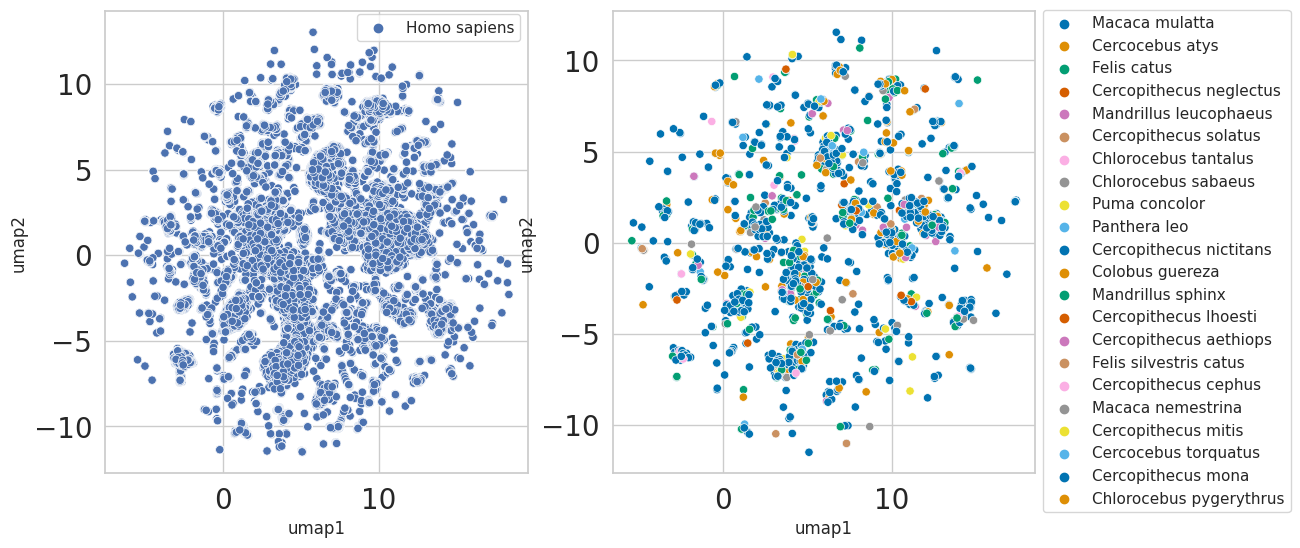

In [40]:
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.set_theme(style="whitegrid")
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 20})

sns.scatterplot(data=umap_emb_df[umap_emb_df[label_col]=="Homo sapiens"], x="umap1", y="umap2", hue=label_col, ax=axs[0])
sns.scatterplot(data=umap_emb_df[umap_emb_df[label_col]!="Homo sapiens"], x="umap1", y="umap2", hue=label_col, ax=axs[1], palette="colorblind")
axs[0].legend(bbox_to_anchor=(1.00, 1.01))
axs[1].legend(bbox_to_anchor=(1.00, 1.02))